$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Using \space CNN \space for \space CIFAR10 \space and \space MNIST \space Datasets $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D,BatchNormalization,Activation,GlobalAveragePooling2D,UpSampling2D
from keras.models import Sequential
from tensorflow.keras.datasets import cifar10,mnist
from keras.utils import set_random_seed
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


## `+` Set Global variables

In [4]:
EPOCHS = 100
BATCH_SIZE = 64
SEED = 124

In [5]:
### Initialize Rondom_Seed
set_random_seed(SEED)

## `+` Load & Preprocess CIFAR 10 Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

In [6]:
# CIFAR-10 class labels
labeled_dictionary = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 
    4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 
    8: 'ship', 9: 'truck'
}

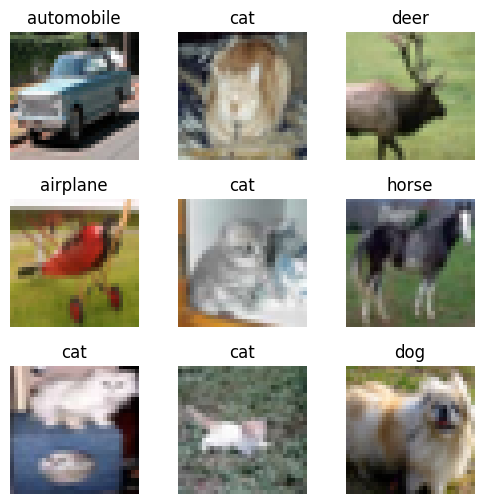

In [10]:
X_sample = X_train[32:32+9]
y_sample = y_train[32:32+9]
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i])
    ax.set_title(labeled_dictionary[y_sample[i][0]])
    ax.axis('off')
plt.show();


### Feature Rescaling

In [11]:
# Rescale Input
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### OneHotEncode Target Variable

In [12]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

## `i` Trial no. 1

### Model Training

In [15]:
## ANN model without any regulrization

model_1 = Sequential()

model_1.add(Input(shape=X_train.shape[1:]))
model_1.add(Flatten())  ## to make the input one vector
## Dense layers....
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer=keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model_1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2317 - loss: 2.0489 - val_accuracy: 0.3137 - val_loss: 1.8544
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3493 - loss: 1.7874 - val_accuracy: 0.3784 - val_loss: 1.7196
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3899 - loss: 1.6933 - val_accuracy: 0.3899 - val_loss: 1.6987
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4159 - loss: 1.6267 - val_accuracy: 0.3943 - val_loss: 1.6941
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4351 - loss: 1.5738 - val_accuracy: 0.4226 - val_loss: 1.6306
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4522 - loss: 1.5353 - val_accuracy: 0.4348 - val_loss: 1.5847
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4647 - loss: 1.4957 - val_accuracy: 0.4361 - val_loss: 1.5957
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4734 - loss: 1.4648 - val_accu

### Model Evaluation

In [12]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
train_ev = model_1.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_1.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6056 - loss: 1.3276
Accuracy for training: 57.29
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4477 - loss: 2.6438
Accuracy for testing: 44.42


### Result Visualization

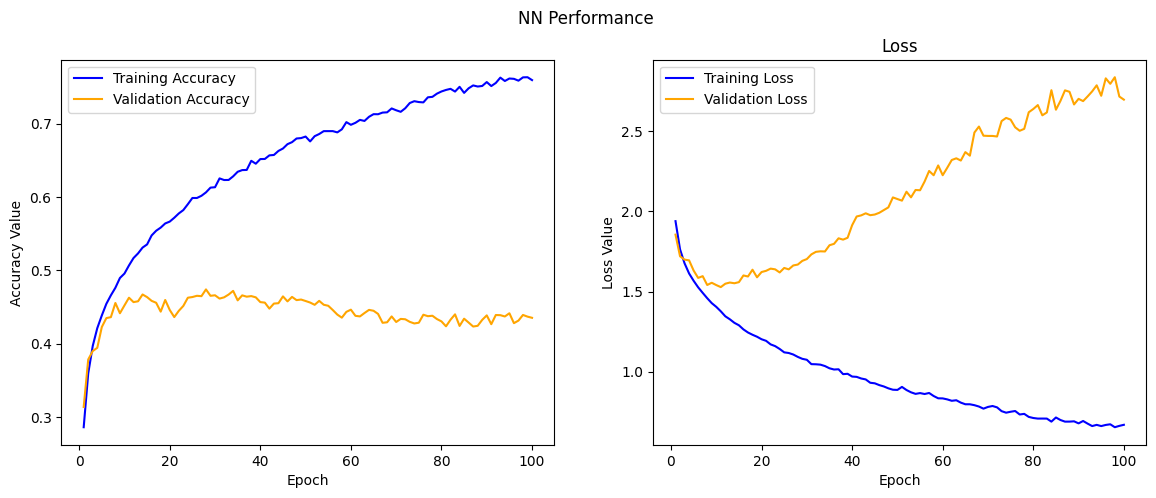

In [18]:
Acc = hist.history['accuracy']
Val_Acc = hist.history['val_accuracy']
Loss = hist.history['loss']
Val_Loss = hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `ii` Trial no. 2

### Model Training

In [19]:
## using BatchNormalization, Dropout as Regularization techniques

model_2 = Sequential()
model_2.add(Input(shape=X_train.shape[1:]))
model_2.add(Flatten())

model_2.add(Dense(1024))
model_2.add(Dropout(0.4))
model_2.add(Activation('relu'))

model_2.add(Dense(512))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(256))
model_2.add(Dropout(0.3))
model_2.add(Activation('relu'))

model_2.add(Dense(128))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(64))
model_2.add(Dropout(0.3))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,848,058 (14.68 MB)

 Trainable params: 3,846,650 (14.67 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [20]:
hist2 = model_2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1566 - loss: 2.2669 - val_accuracy: 0.2994 - val_loss: 1.9221
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2988 - loss: 1.9351 - val_accuracy: 0.3333 - val_loss: 1.8261
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3206 - loss: 1.8705 - val_accuracy: 0.3320 - val_loss: 1.8287
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3347 - loss: 1.8304 - val_accuracy: 0.3683 - val_loss: 1.7394
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3475 - loss: 1.7997 - val_accuracy: 0.3747 - val_loss: 1.7253
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3606 - loss: 1.7705 - val_accuracy: 0.3820 - val_loss: 1.6926
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3709 - loss: 1.7383 - val_accuracy: 0.4110 - val_loss: 1.6410
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3849 - loss: 1.7132 - val_acc

### Model Evaluation

In [21]:
train_ev = model_2.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_2.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5694 - loss: 1.2131
Accuracy for training: 54.72
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4593 - loss: 1.5462
Accuracy for testing: 45.67


### Result Visualization

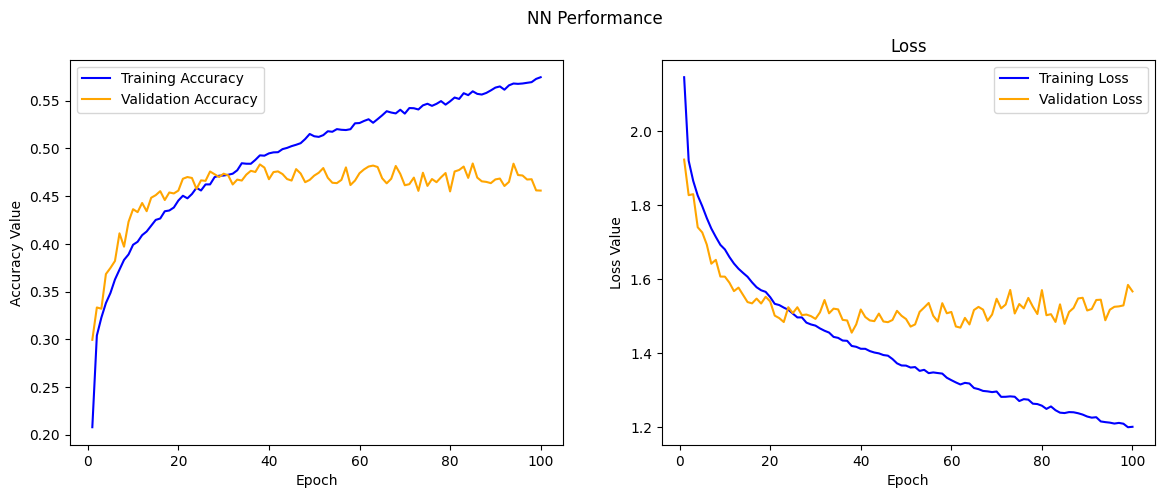

In [22]:
Acc = hist2.history['accuracy']
Val_Acc = hist2.history['val_accuracy']
Loss = hist2.history['loss']
Val_Loss = hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

**Note:** Add more trials and explore different hyperparameters and design decisions.

## `iii` Trial no. 3

### Model Training

In [13]:
## change optimizer

model_3 = Sequential()

model_3.add(Input(shape=X_train.shape[1:]))
model_3.add(Flatten())


model_3.add(Dense(1024))
model_3.add(Dropout(0.4))
model_3.add(Activation('relu'))

model_3.add(Dense(512))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dense(256))
model_3.add(Activation('relu'))

model_3.add(Dense(128))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dense(64))
model_3.add(Activation('relu'))

model_3.add(Dense(16, activation='relu'))

model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,847,802 (14.68 MB)

 Trainable params: 3,846,522 (14.67 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [14]:

hist3 = model_3.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1628 - loss: 2.2509 - val_accuracy: 0.3161 - val_loss: 1.9414
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3068 - loss: 1.9415 - val_accuracy: 0.3560 - val_loss: 1.8072
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3494 - loss: 1.8175 - val_accuracy: 0.3840 - val_loss: 1.7165
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3735 - loss: 1.7409 - val_accuracy: 0.4000 - val_loss: 1.6668
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3896 - loss: 1.7000 - val_accuracy: 0.4141 - val_loss: 1.6398
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4006 - loss: 1.6619 - val_accuracy: 0.4307 - val_loss: 1.5855
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4131 - loss: 1.6282 - val_accuracy: 0.4329 - val_loss: 1.5933
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4292 - loss: 1.5972 - val_accu

### Model Evaluation



In [15]:
train_ev = model_3.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_3.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7631 - loss: 0.6677
Accuracy for training: 72.30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5305 - loss: 1.5436
Accuracy for testing: 53.02


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The class of predicted sample: 3 --> (cat)
The actual class of the same sample: 5 --> (dog)
Match: False


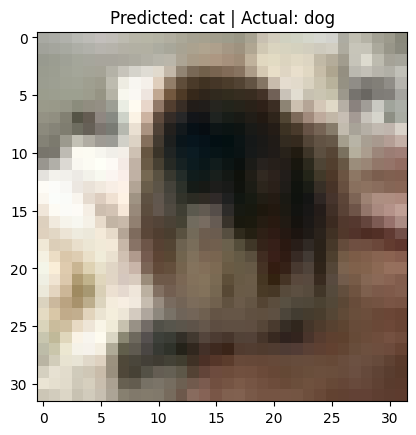

In [17]:
## just check......
my_image = X_test[200]
plt.imshow(my_image)


pred = np.argmax(model_3.predict(X_test[200:201]))
actual = np.argmax(y_test[200])

print(f'The class of predicted sample: {pred} --> ({labeled_dictionary[pred]})')
print(f'The actual class of the same sample: {actual} --> ({labeled_dictionary[actual]})')
print("Match:", pred == actual)

plt.title(f"Predicted: {labeled_dictionary[pred]} | Actual: {labeled_dictionary[actual]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The class of predicted sample: 2 --> (bird)
The actual class of the same sample: 2 --> (bird)
Match: True


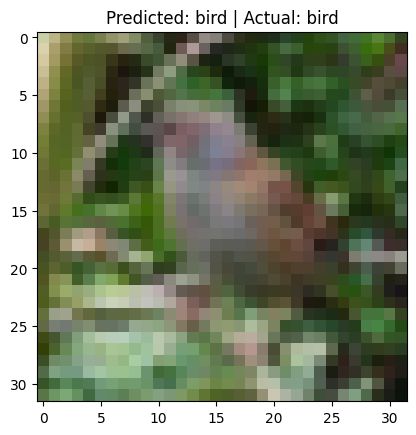

In [18]:
## just check......
my_image = X_test[65]
plt.imshow(my_image)


pred = np.argmax(model_3.predict(X_test[65:66]))
actual = np.argmax(y_test[65])

print(f'The class of predicted sample: {pred} --> ({labeled_dictionary[pred]})')
print(f'The actual class of the same sample: {actual} --> ({labeled_dictionary[actual]})')
print("Match:", pred == actual)

plt.title(f"Predicted: {labeled_dictionary[pred]} | Actual: {labeled_dictionary[actual]}")
plt.show()

In [19]:
probs = model_3.predict(X_test[65:66])
print(f"Predicted probabilities: {probs}")
print(f"Confidence: {max(probs[0])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted probabilities: [[3.2740147e-06 3.1571421e-09 9.2807919e-01 6.1746556e-03 7.8902636e-03
  1.3016552e-03 5.6360085e-02 1.9005753e-04 5.3286709e-07 9.8221612e-08]]
Confidence: 0.9280791878700256


### Result Visualization

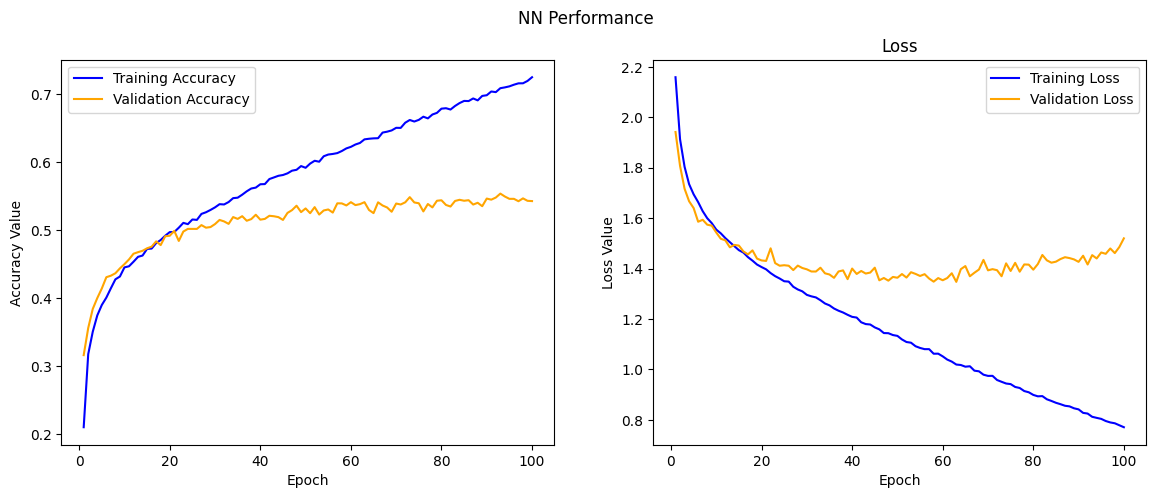

In [20]:
Acc = hist3.history['accuracy']
Val_Acc = hist3.history['val_accuracy']
Loss = hist3.history['loss']
Val_Loss = hist3.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

---------------
## `iv` Trial no. 4


### Model Training

In [24]:
## Add early stopping......

model_4 = Sequential()

model_4.add(Input(shape=X_train.shape[1:]))
model_4.add(Flatten())

model_4.add(Dense(1024))
model_4.add(Dropout(0.5))
model_4.add(Activation('relu'))

model_4.add(Dense(512))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Dense(256))
# model_4.add(Dropout(0.3))
model_4.add(Activation('relu'))

model_4.add(Dense(128))
# model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Dense(64))
model_4.add(Dropout(0.2))
model_4.add(Activation('relu'))

model_4.add(Dense(32))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Dense(16, activation='relu'))
model_4.add(Dense(10, activation='softmax'))

## compile the model
model_4.compile(optimizer=keras.optimizers.Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,848,986 (14.68 MB)

 Trainable params: 3,847,898 (14.68 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [25]:

hist4 = model_4.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1535 - loss: 2.2562 - val_accuracy: 0.2963 - val_loss: 1.9297
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2847 - loss: 1.9519 - val_accuracy: 0.3076 - val_loss: 1.8883
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3145 - loss: 1.8948 - val_accuracy: 0.3445 - val_loss: 1.8133
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3294 - loss: 1.8493 - val_accuracy: 0.3622 - val_loss: 1.7661
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3400 - loss: 1.8184 - val_accuracy: 0.3663 - val_loss: 1.7670
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3487 - loss: 1.7957 - val_accuracy: 0.3691 - val_loss: 1.7427
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3527 - loss: 1.7793 - val_accuracy: 0.3692 - val_loss: 1.7416
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3661 - loss: 1.7555 - val_accu

### Model Evaluation

In [26]:

train_ev = model_4.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_4.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4680 - loss: 1.5102
Accuracy for training: 46.42
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4586 - loss: 1.5565
Accuracy for testing: 45.42


## the model still need to gain more learning but there is no overfitting....

### Result Visualization


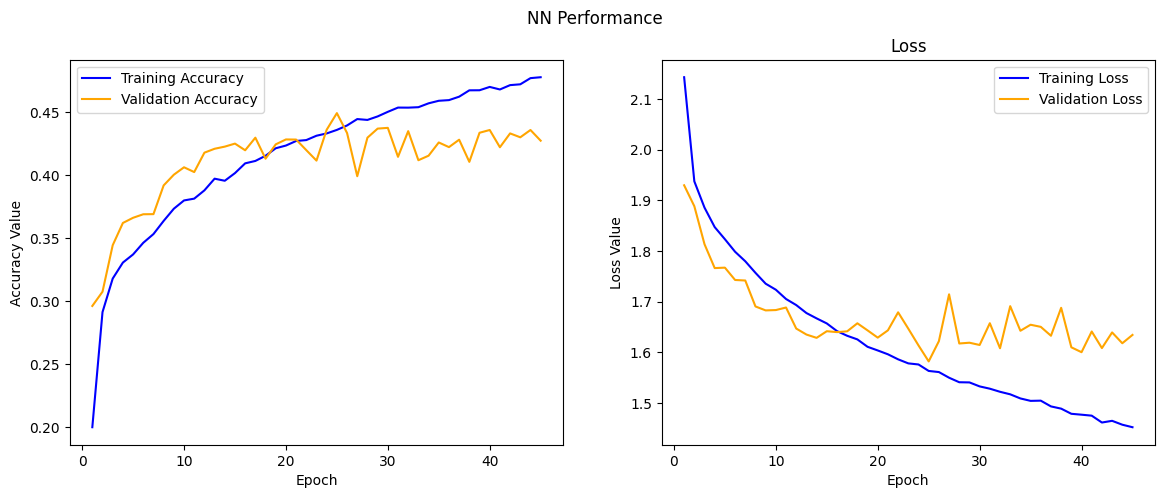

In [27]:
Acc = hist4.history['accuracy']
Val_Acc = hist4.history['val_accuracy']
Loss = hist4.history['loss']
Val_Loss = hist4.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

---------------
## `v` Trial no. 5


### Model Training

In [34]:
## add early stopping on accuracy .....

model_5 = Sequential()

model_5.add(Input(shape=X_train.shape[1:]))
model_5.add(Flatten())

model_5.add(Dense(1024))
model_5.add(Dropout(0.4))
model_5.add(Activation('relu'))

model_5.add(Dense(512))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(256))
model_5.add(Dropout(0.3))
model_5.add(Activation('relu'))

model_5.add(Dense(128))
# model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(64))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(32))
# model_5.add(Dropout(0.2))
# model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(16, activation='relu'))

model_5.add(Dense(10, activation='softmax'))
model_5.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])


early_stop = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
model_5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,849,114 (14.68 MB)

 Trainable params: 3,847,962 (14.68 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [35]:

hist5 = model_5.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1258 - loss: 2.3109 - val_accuracy: 0.2070 - val_loss: 2.1694
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2015 - loss: 2.1369 - val_accuracy: 0.2738 - val_loss: 1.9811
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2684 - loss: 1.9718 - val_accuracy: 0.3077 - val_loss: 1.8774
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2964 - loss: 1.8976 - val_accuracy: 0.3467 - val_loss: 1.8124
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3182 - loss: 1.8522 - val_accuracy: 0.3586 - val_loss: 1.7842
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3412 - loss: 1.8088 - val_accuracy: 0.3638 - val_loss: 1.7586
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3530 - loss: 1.7809 - val_accuracy: 0.3838 - val_loss: 1.7081
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3691 - loss: 1.7452 - val_accu

### Model Evaluation


In [37]:
train_loss, train_acc = model_5.evaluate(X_train, y_train)
test_loss, test_acc = model_5.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7104 - loss: 0.8197
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5442 - loss: 1.3364
Accuracy for training: 67.74
Accuracy for testing: 53.94


### Result Visualization

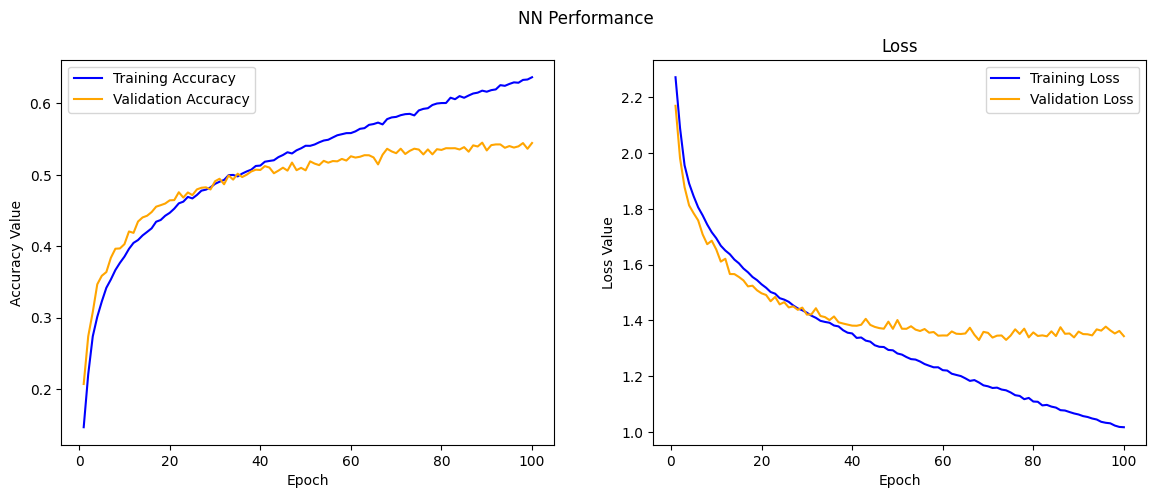

In [38]:
Acc = hist5.history['accuracy']
Val_Acc = hist5.history['val_accuracy']
Loss = hist5.history['loss']
Val_Loss = hist5.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [7]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
## read data again to skip the scaling step we applied before.....
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:

## processing the input according to the way of the resnet model
X_train_pro = preprocess_input(X_train)
X_test_pro = preprocess_input(X_test)

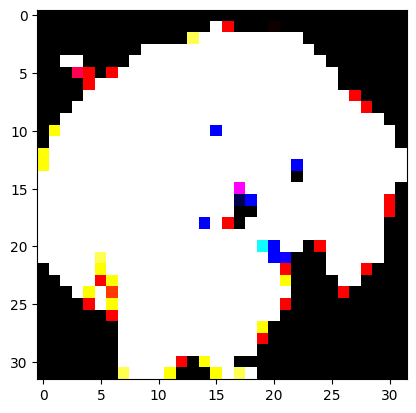

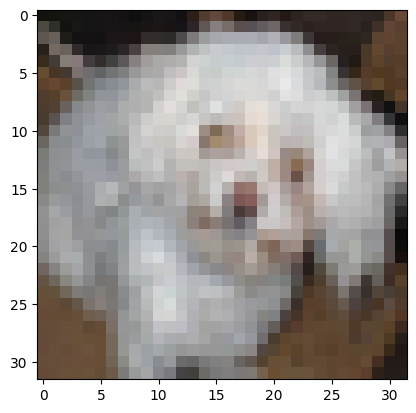

In [25]:
my_image = X_test_pro[1000]
plt.imshow(my_image)
plt.show();

my_image = X_test[1000]
plt.imshow(my_image)
plt.show();

In [26]:

#Freeze all layers of the pretrained model..
for layer in resnet_base.layers[:-1]:
    layer.trainable = False


transfer_model = Sequential()
transfer_model.add(Input(shape=X_train_pro.shape[1:]))

## resize input according to the resnet inputs
transfer_model.add(UpSampling2D(size=(7, 7)))

transfer_model.add(resnet_base)

transfer_model.add(GlobalAveragePooling2D()) ## As a flatten layer

transfer_model.add(Dense(512,activation='relu'))

transfer_model.add(Dense(32 , kernel_regularizer=l2(0.01)))
transfer_model.add(Dropout(0.4))
transfer_model.add(Activation('relu'))

transfer_model.add(Dense(16 , kernel_regularizer=l2(0.01)))
transfer_model.add(BatchNormalization())
transfer_model.add(Activation('relu'))

transfer_model.add(Dense(10, activation='softmax'))

transfer_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,653,978 (94.05 MB)

 Trainable params: 1,066,234 (4.07 MB)

 Non-trainable params: 23,587,744 (89.98 MB)

In [27]:
pre_hist = transfer_model.fit(X_train_pro,y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop]) 

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.4869 - loss: 1.9146 - val_accuracy: 0.7250 - val_loss: 0.9327
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7379 - loss: 0.8863 - val_accuracy: 0.7868 - val_loss: 0.7075
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7769 - loss: 0.7366 - val_accuracy: 0.8082 - val_loss: 0.6115
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8072 - loss: 0.6529 - val_accuracy: 0.8152 - val_loss: 0.5877
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8210 - loss: 0.6025 - val_accuracy: 0.8105 - val_loss: 0.6134
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8341 - loss: 0.5671 - val_accuracy: 0.8245 - val_loss: 0.5758
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8396 - loss: 0.5405 - val_accuracy: 0.8172 - val_loss: 0.6098
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8514 - loss: 0.5072 -

### Model Evaluation

In [28]:
train_ev = transfer_model.evaluate(X_train_pro,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = transfer_model.evaluate(X_test_pro, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.9101 - loss: 0.3165
Accuracy for training: 89.54
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8288 - loss: 0.5801
Accuracy for testing: 82.71


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The class of predicted sample: 6 --> (frog)
The actual class of the same sample: 6 --> (frog)
Match: True


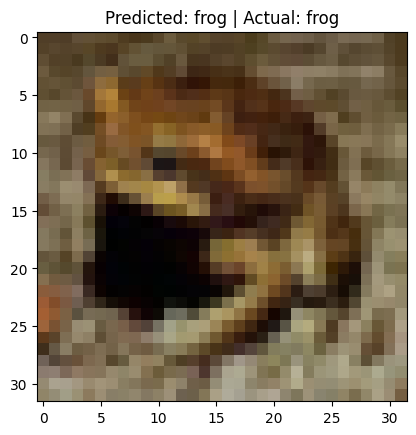

In [29]:
my_image = X_test[300]
plt.imshow(my_image)


pred = np.argmax(transfer_model.predict(X_test_pro[300:301]))
actual = np.argmax(y_test[300])

print(f'The class of predicted sample: {pred} --> ({labeled_dictionary[pred]})')
print(f'The actual class of the same sample: {actual} --> ({labeled_dictionary[actual]})')
print("Match:", pred == actual)

plt.title(f"Predicted: {labeled_dictionary[pred]} | Actual: {labeled_dictionary[actual]}")
plt.show()

### Result Visualization

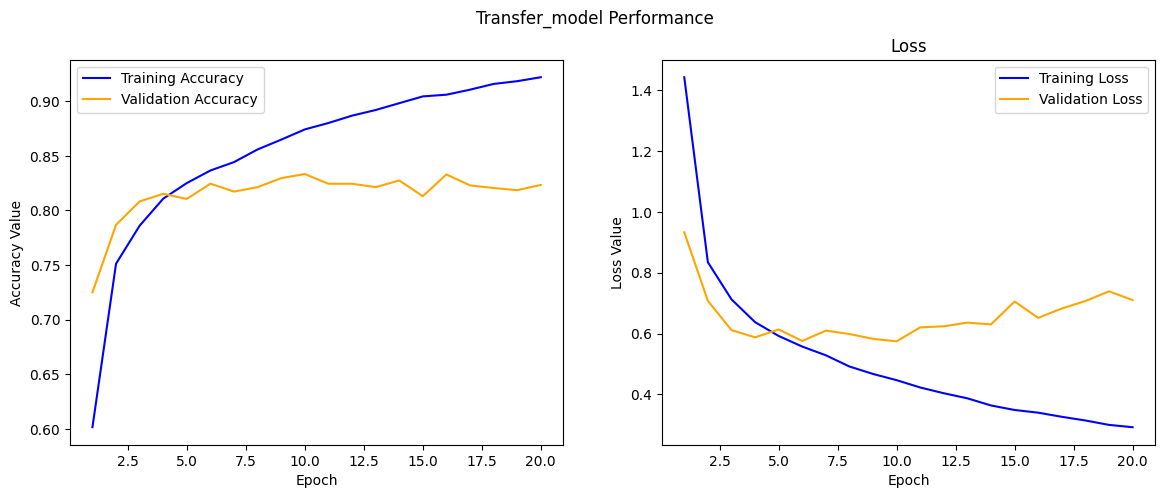

In [30]:
Acc = pre_hist.history['accuracy']
Val_Acc = pre_hist.history['val_accuracy']
Loss = pre_hist.history['loss']
Val_Loss = pre_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `ii` Trial no. 2

### Model Training

In [9]:
## change the optimizer ....


for layer in resnet_base.layers[:-1]:
    layer.trainable = False


res_model = Sequential()
res_model.add(Input(shape=X_train.shape[1:]))

## resize input according to the resnet inputs
res_model.add(UpSampling2D(size=(7, 7)))

res_model.add(resnet_base)
res_model.add(GlobalAveragePooling2D()) ## flatten ...


res_model.add(Dense(1024))
res_model.add(Dropout(0.3)) ## reduce overfitting
res_model.add(Activation('relu'))

res_model.add(Dense(512))
res_model.add(BatchNormalization())
res_model.add(Activation('relu'))

res_model.add(Dense(64))
res_model.add(Activation('relu'))

res_model.add(Dense(10, activation="softmax"))

res_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


res_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,246,218 (100.12 MB)

 Trainable params: 2,657,482 (10.14 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

In [10]:
res_hist = res_model.fit(X_train_pro,y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.5223 - loss: 1.3871 - val_accuracy: 0.7563 - val_loss: 0.7157
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.7401 - loss: 0.7503 - val_accuracy: 0.7838 - val_loss: 0.6214
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7751 - loss: 0.6508 - val_accuracy: 0.8010 - val_loss: 0.5735
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.7975 - loss: 0.5854 - val_accuracy: 0.8069 - val_loss: 0.5439
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.8103 - loss: 0.5490 - val_accuracy: 0.8143 - val_loss: 0.5248
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8210 - loss: 0.5105 - val_accuracy: 0.8150 - val_loss: 0.5204
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8353 - loss: 0.4745 - val_accuracy: 0.8202 - val_loss: 0.5068
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8425 - loss: 0.4501 -

### Model Evaluation

In [15]:
train_loss, train_acc = res_model.evaluate(X_train_pro, y_train)
test_loss, test_acc = res_model.evaluate(X_test_pro, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.9186 - loss: 0.2474
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8342 - loss: 0.4885
Accuracy for training: 90.17
Accuracy for testing: 83.31


### Result Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The class of predicted sample: 0 --> (airplane)
The actual class of the same sample: 0 --> (airplane)
Match: True


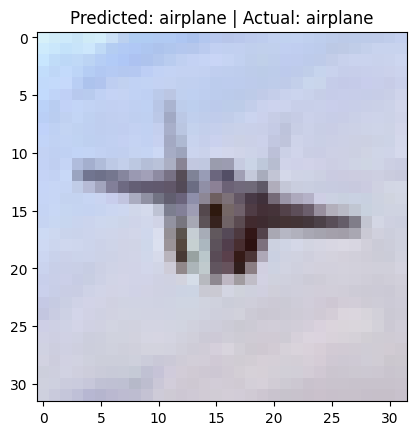

In [11]:
## create random number to get everytime different image
rnum=np.random.randint(0,len(X_test))
my_image = X_test[rnum]
plt.imshow(my_image)


pred = np.argmax(res_model.predict(X_test_pro[rnum:rnum+1]))
actual = np.argmax(y_test[rnum])

print(f'The class of predicted sample: {pred} --> ({labeled_dictionary[pred]})')
print(f'The actual class of the same sample: {actual} --> ({labeled_dictionary[actual]})')
print("Match:", pred == actual)

plt.title(f"Predicted: {labeled_dictionary[pred]} | Actual: {labeled_dictionary[actual]}")
plt.show()

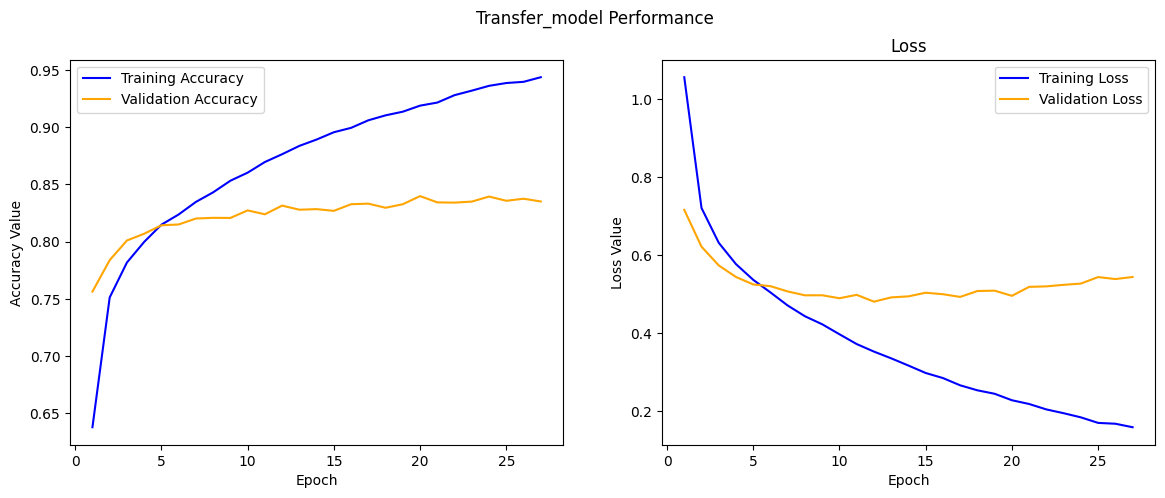

In [12]:
# Plot the training accuracy and loss

Acc = res_hist.history['accuracy']
Val_Acc = res_hist.history['val_accuracy']
Loss = res_hist.history['loss']
Val_Loss = res_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `iii` Trial no. 3

## Model Training



In [11]:
# Unfreeze last 3 layers for fine-tuning
for layer in resnet_base.layers[:-3]:
    layer.trainable = False




res_model2 = Sequential()
res_model2.add(Input(shape=X_train_pro.shape[1:]))
## resize input according to the resnet inputs
res_model2.add(UpSampling2D(size=(7, 7)))

res_model2.add(resnet_base)
res_model2.add(GlobalAveragePooling2D()) ## flatten ...


res_model2.add(Dense(1024))
res_model2.add(Dropout(0.5)) ## reduce overfitting
res_model2.add(Activation('relu'))

res_model2.add(Dense(512))
res_model2.add(BatchNormalization())
res_model2.add(Activation('relu'))

res_model2.add(Dense(10, activation="softmax"))

res_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


res_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,217,866 (100.01 MB)

 Trainable params: 2,633,226 (10.04 MB)

 Non-trainable params: 23,584,640 (89.97 MB)

In [12]:
res_hist2 = res_model2.fit(X_train_pro,y_train, epochs=35, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 102ms/step - accuracy: 0.6500 - loss: 1.0023 - val_accuracy: 0.7836 - val_loss: 0.6083
Epoch 2/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7746 - loss: 0.6477 - val_accuracy: 0.8065 - val_loss: 0.5485
Epoch 3/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8022 - loss: 0.5693 - val_accuracy: 0.8214 - val_loss: 0.4967
Epoch 4/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8161 - loss: 0.5206 - val_accuracy: 0.8274 - val_loss: 0.4849
Epoch 5/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8317 - loss: 0.4799 - val_accuracy: 0.8296 - val_loss: 0.4824
Epoch 6/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8402 - loss: 0.4500 - val_accuracy: 0.8289 - val_loss: 0.4869
Epoch 7/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8536 - loss: 0.4139 - val_accuracy: 0.8332 - val_loss: 0.4827
Epoch 8/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8632 - loss: 0.3884 -

### Model Evaluation


In [13]:
train_loss, train_acc = res_model2.evaluate(X_train_pro, y_train)
test_loss, test_acc = res_model2.evaluate(X_test_pro, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.9891 - loss: 0.0412
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8452 - loss: 0.6673
Accuracy for training: 96.39
Accuracy for testing: 84.69


### Result Visualization

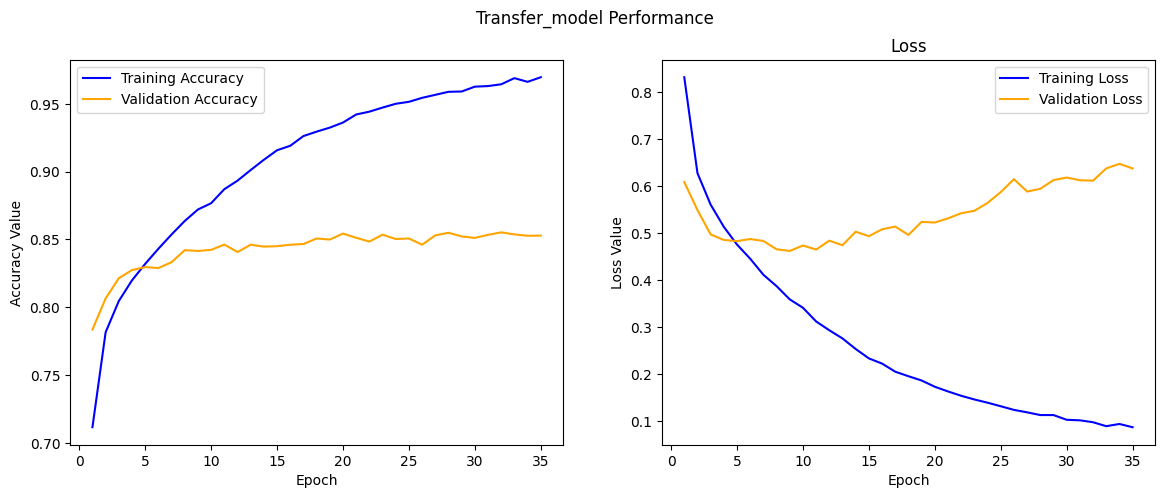

In [14]:
# Plot the training accuracy and loss

Acc = res_hist2.history['accuracy']
Val_Acc = res_hist2.history['val_accuracy']
Loss = res_hist2.history['loss']
Val_Loss = res_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The class of predicted sample: 5 --> (dog)
The actual class of the same sample: 5 --> (dog)
Match: True


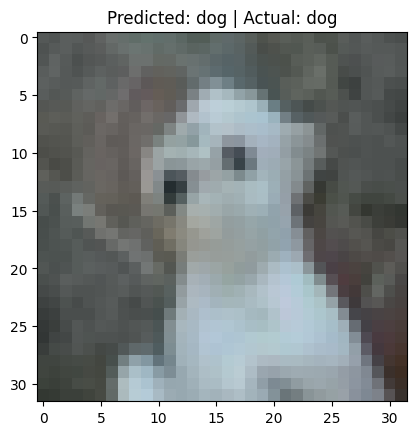

In [16]:
rnum=np.random.randint(0,len(X_test))
my_image = X_test[rnum]
plt.imshow(my_image)


pred = np.argmax(res_model2.predict(X_test_pro[rnum:rnum+1]))
actual = np.argmax(y_test[rnum])

print(f'The class of predicted sample: {pred} --> ({labeled_dictionary[pred]})')
print(f'The actual class of the same sample: {actual} --> ({labeled_dictionary[actual]})')
print("Match:", pred == actual)

plt.title(f"Predicted: {labeled_dictionary[pred]} | Actual: {labeled_dictionary[actual]}")
plt.show()

---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [17]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
np.unique(y_train) ## no of classes...

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Preview the Images

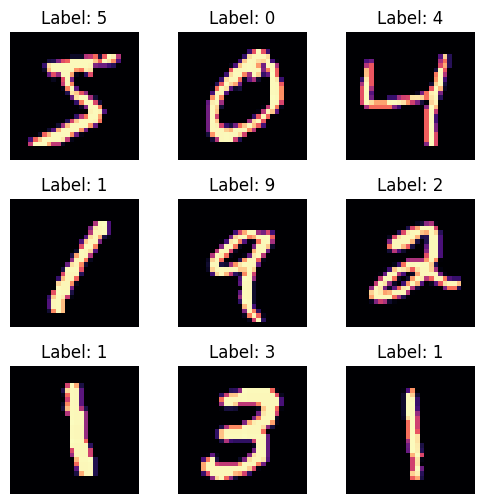

In [21]:
# plot first few images
X_sample = X_train[:9]

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i],cmap='magma')
    ax.set_title(f'Label: {np.argmax(y_train[i])}')
    ax.axis('off')


plt.show();


### Rescale Independent Features

In [ ]:
# Rescale the Input
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 100

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
### just flatten the input then add FC layers

model_Ann = Sequential()
model_Ann.add(Input(shape=X_train.shape[1:]))
model_Ann.add(Flatten())
model_Ann.add(Dense(512, activation='relu'))
model_Ann.add(Dense(128, activation='relu'))
model_Ann.add(Dense(64, activation='relu'))
model_Ann.add(Dense(32, activation='relu'))
model_Ann.add(Dense(NUM_CLASSES , activation='softmax'))
model_Ann.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_Ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,250 (1.82 MB)

 Trainable params: 478,250 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist_hist1 = model_Ann.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6756 - loss: 1.0792 - val_accuracy: 0.9282 - val_loss: 0.2406
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.2201 - val_accuracy: 0.9482 - val_loss: 0.1777
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.1576 - val_accuracy: 0.9572 - val_loss: 0.1468
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1226 - val_accuracy: 0.9631 - val_loss: 0.1273
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0986 - val_accuracy: 0.9671 - val_loss: 0.1148
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0808 - val_accuracy: 0.9690 - val_loss: 0.1078
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0669 - val_accuracy: 0.9695 - val_loss: 0.1033
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0556 - val_accu

#### Model Ealuation

In [ ]:
train_loss, train_acc = model_Ann.evaluate(X_train, y_train)
test_loss, test_acc = model_Ann.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9995 - loss: 0.0055
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.2647
Accuracy for training: 99.57
Accuracy for testing: 97.97


#### Result Visualization

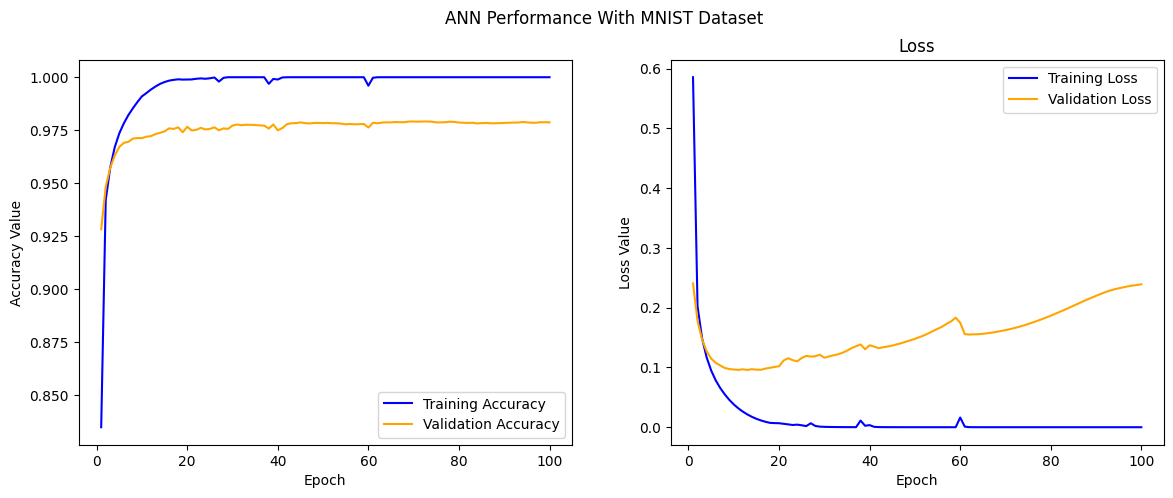

In [ ]:
# Plot the training accuracy and loss

Acc = mnist_hist1.history['accuracy']
Val_Acc = mnist_hist1.history['val_accuracy']
Loss = mnist_hist1.history['loss']
Val_Loss = mnist_hist1.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('ANN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

### Trial no. 2

#### Model Training

In [ ]:
### just flatten the input then add FC layers
## try to change the optimizer

model_Ann2 = Sequential()
model_Ann2.add(Input(shape=X_train.shape[1:]))
model_Ann2.add(Flatten())
model_Ann2.add(Dense(512))
model_Ann2.add(Dropout(0.3))
model_Ann2.add(Activation('relu'))

model_Ann2.add(Dense(128, activation='relu'))
model_Ann2.add(Dense(64, activation='relu'))
model_Ann2.add(Dense(32, activation='relu'))
model_Ann2.add(Dense(NUM_CLASSES , activation='softmax'))
model_Ann2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model_Ann2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,250 (1.82 MB)

 Trainable params: 478,250 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist_hist2 = model_Ann2.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1260 - loss: 2.2679 - val_accuracy: 0.3402 - val_loss: 2.1124
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2964 - loss: 2.0828 - val_accuracy: 0.5429 - val_loss: 1.7843
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 1.7473 - val_accuracy: 0.7068 - val_loss: 1.3348
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6609 - loss: 1.3295 - val_accuracy: 0.7812 - val_loss: 0.9511
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 1.0031 - val_accuracy: 0.8183 - val_loss: 0.7207
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7737 - loss: 0.8057 - val_accuracy: 0.8421 - val_loss: 0.5924
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.6906 - val_accuracy: 0.8592 - val_loss: 0.5139
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.6092 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Ann2.evaluate(X_train, y_train)
test_loss, test_acc = model_Ann2.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0969
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1374
Accuracy for training: 96.99
Accuracy for testing: 96.30


#### Result Visualization

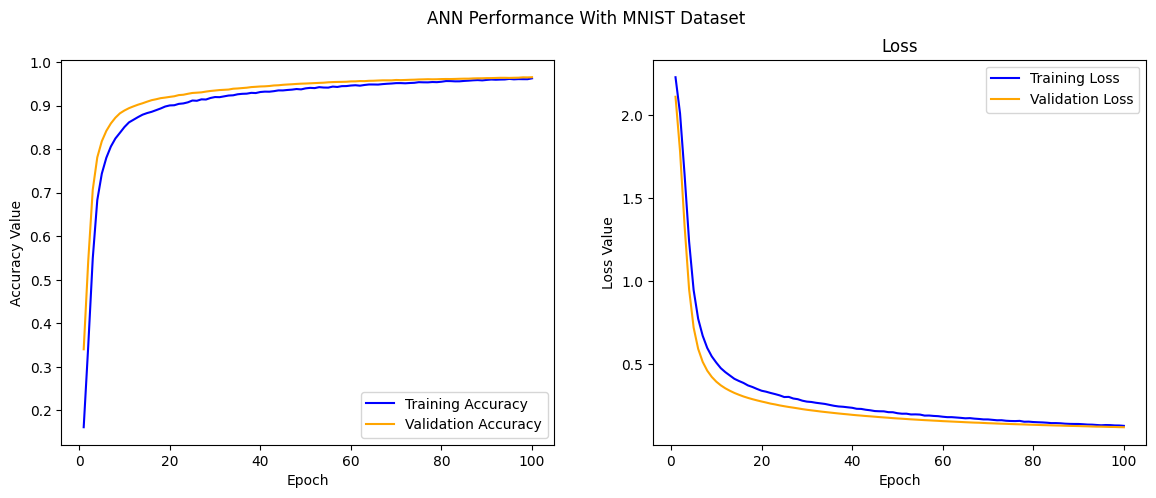

In [ ]:
# Plot the training accuracy and loss

Acc = mnist_hist2.history['accuracy']
Val_Acc = mnist_hist2.history['val_accuracy']
Loss = mnist_hist2.history['loss']
Val_Loss = mnist_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('ANN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
The class of predicted sample: 9
The actual class of the same sample: 9
Match: True


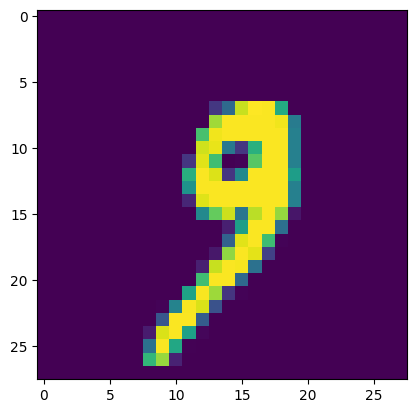

In [ ]:
## just check......
my_image = X_test[1000]
plt.imshow(my_image)


pred = np.argmax(model_Ann2.predict(X_test[1000:1001]))
actual = np.argmax(y_test[1000])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The class of predicted sample: 6
The actual class of the same sample: 6
Match: True


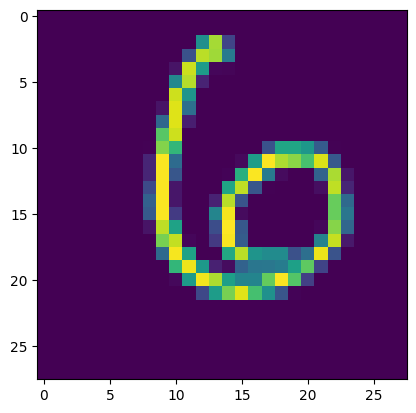

In [ ]:
## just check......
my_image = X_test[100]
plt.imshow(my_image)


pred = np.argmax(model_Ann2.predict(X_test[100:101]))
actual = np.argmax(y_test[100])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train =X_train.reshape(-1,28,28,1)
X_test =X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [ ]:
model_Cnn = Sequential()

### convalution layers --> make tow layers
model_Cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model_Cnn.add(MaxPooling2D((2,2)))

model_Cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_Cnn.add(MaxPooling2D((2,2)))

## flatten layer
model_Cnn.add(Flatten())

## FC layers
model_Cnn.add(Dense(128))
model_Cnn.add(Dropout(0.2))
model_Cnn.add(Activation('relu'))

model_Cnn.add(Dense(64))
model_Cnn.add(Dropout(0.2))
model_Cnn.add(Activation('relu'))


model_Cnn.add(Dense(NUM_CLASSES , activation='softmax')) ## out layer

model_Cnn.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model_Cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Cnn_hist = model_Cnn.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1452 - loss: 2.2908 - val_accuracy: 0.3900 - val_loss: 2.2189
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3262 - loss: 2.1918 - val_accuracy: 0.5156 - val_loss: 1.9921
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4196 - loss: 1.9366 - val_accuracy: 0.6651 - val_loss: 1.4530
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5551 - loss: 1.4649 - val_accuracy: 0.7802 - val_loss: 0.9103
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6660 - loss: 1.0581 - val_accuracy: 0.8422 - val_loss: 0.6333
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7421 - loss: 0.8215 - val_accuracy: 0.8712 - val_loss: 0.4919
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7828 - loss: 0.6855 - val_accuracy: 0.8871 - val_loss: 0.4159
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8112 - loss: 0.6050 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Cnn.evaluate(X_train, y_train)
test_loss, test_acc = model_Cnn.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0497
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0665
Accuracy for training: 98.37
Accuracy for testing: 98.31


#### Result Visualization

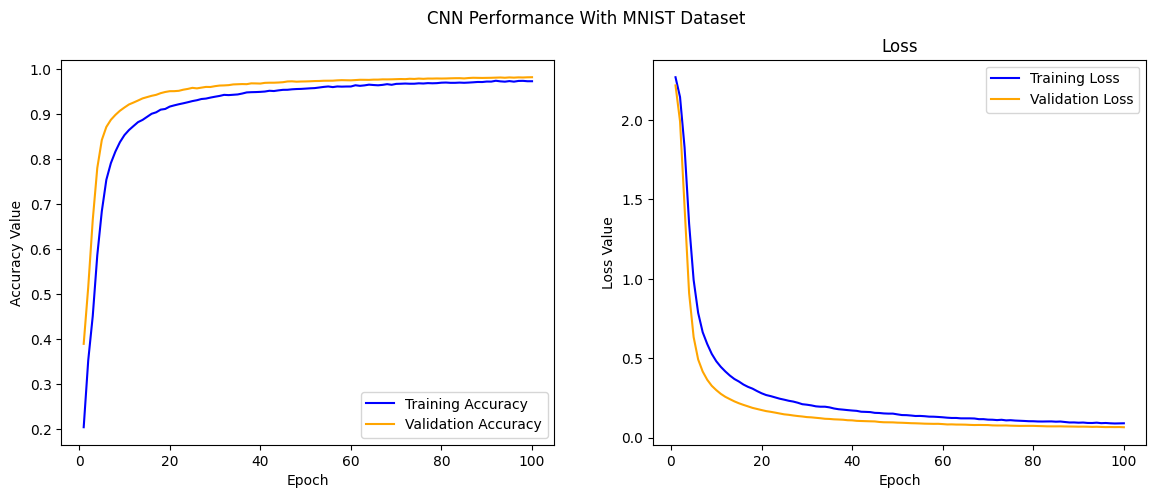

In [ ]:
# Plot the training accuracy and loss

Acc = Cnn_hist.history['accuracy']
Val_Acc = Cnn_hist.history['val_accuracy']
Loss = Cnn_hist.history['loss']
Val_Loss = Cnn_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('CNN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
The class of predicted sample: 3
The actual class of the same sample: 3
Match: True


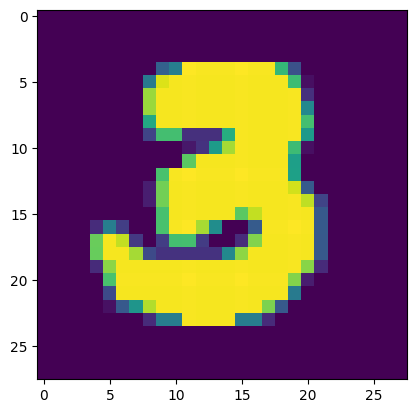

In [ ]:
## just check......
my_image = X_test[200]
plt.imshow(my_image)


pred = np.argmax(model_Cnn.predict(X_test[200:201]))
actual = np.argmax(y_test[200])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The class of predicted sample: 1
The actual class of the same sample: 1
Match: True


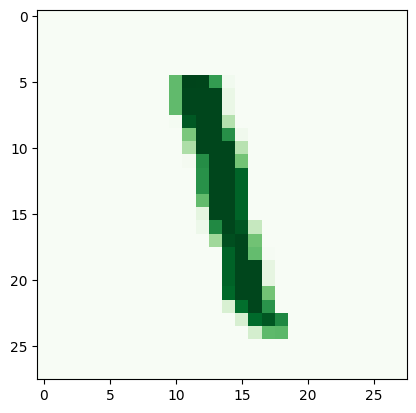

In [ ]:
## just check......
my_image = X_test[700]
plt.imshow(my_image,cmap='Greens')


pred = np.argmax(model_Cnn.predict(X_test[700:701]))
actual = np.argmax(y_test[700])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

### Trial no. 2

#### Model Training

In [ ]:
model_Cnn2 = Sequential()

model_Cnn2.add(Conv2D(16, kernel_size = (3,3), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_Cnn2.add(Conv2D(16, kernel_size = (3,3), padding='same', activation='relu'))
model_Cnn2.add(MaxPooling2D((2,2)))

model_Cnn2.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model_Cnn2.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model_Cnn2.add(MaxPooling2D((2,2)))


model_Cnn2.add(Flatten())

## FC layers
model_Cnn2.add(Dense(124))
model_Cnn2.add(Dropout(0.4))
model_Cnn2.add(Activation('relu'))

model_Cnn2.add(Dense(64))
model_Cnn2.add(BatchNormalization())
model_Cnn2.add(Activation('relu'))

model_Cnn2.add(Dense(NUM_CLASSES , activation='softmax')) ## out layer

model_Cnn2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_Cnn2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 124)                 │          99,324 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,598 (486.71 KB)

 Trainable params: 124,470 (486.21 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
Cnn_hist2 = model_Cnn2.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5842 - loss: 1.3655 - val_accuracy: 0.9557 - val_loss: 0.2425
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9409 - loss: 0.3076 - val_accuracy: 0.9729 - val_loss: 0.1248
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9609 - loss: 0.1767 - val_accuracy: 0.9788 - val_loss: 0.0839
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.1216 - val_accuracy: 0.9823 - val_loss: 0.0657
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9770 - loss: 0.0950 - val_accuracy: 0.9844 - val_loss: 0.0558
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9802 - loss: 0.0775 - val_accuracy: 0.9863 - val_loss: 0.0476
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0655 - val_accuracy: 0.9873 - val_loss: 0.0446
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9856 - loss: 0.0561 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Cnn2.evaluate(X_train, y_train)
test_loss, test_acc = model_Cnn2.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9998 - loss: 9.6445e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0338
Accuracy for training: 99.84
Accuracy for testing: 99.36


#### Result Visualization

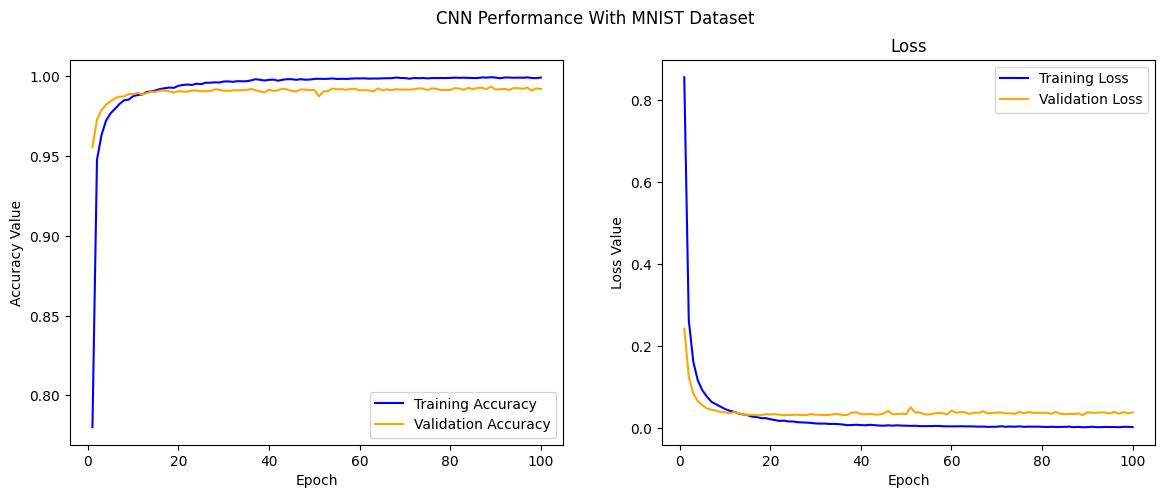

In [ ]:
# Plot the training accuracy and loss

Acc = Cnn_hist2.history['accuracy']
Val_Acc = Cnn_hist2.history['val_accuracy']
Loss = Cnn_hist2.history['loss']
Val_Loss = Cnn_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('CNN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The class of predicted sample: 8
The actual class of the same sample: 8
Match: True


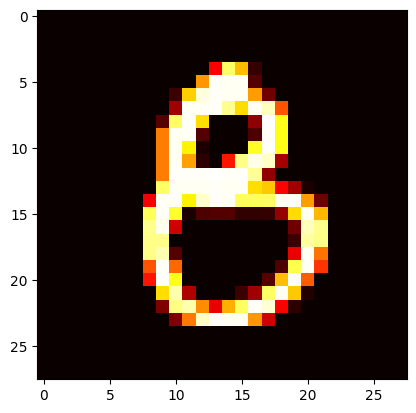

In [ ]:
## just check......
my_image = X_test[800]
plt.imshow(my_image,cmap='hot')


pred = np.argmax(model_Cnn2.predict(X_test[800:801]))
actual = np.argmax(y_test[800])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


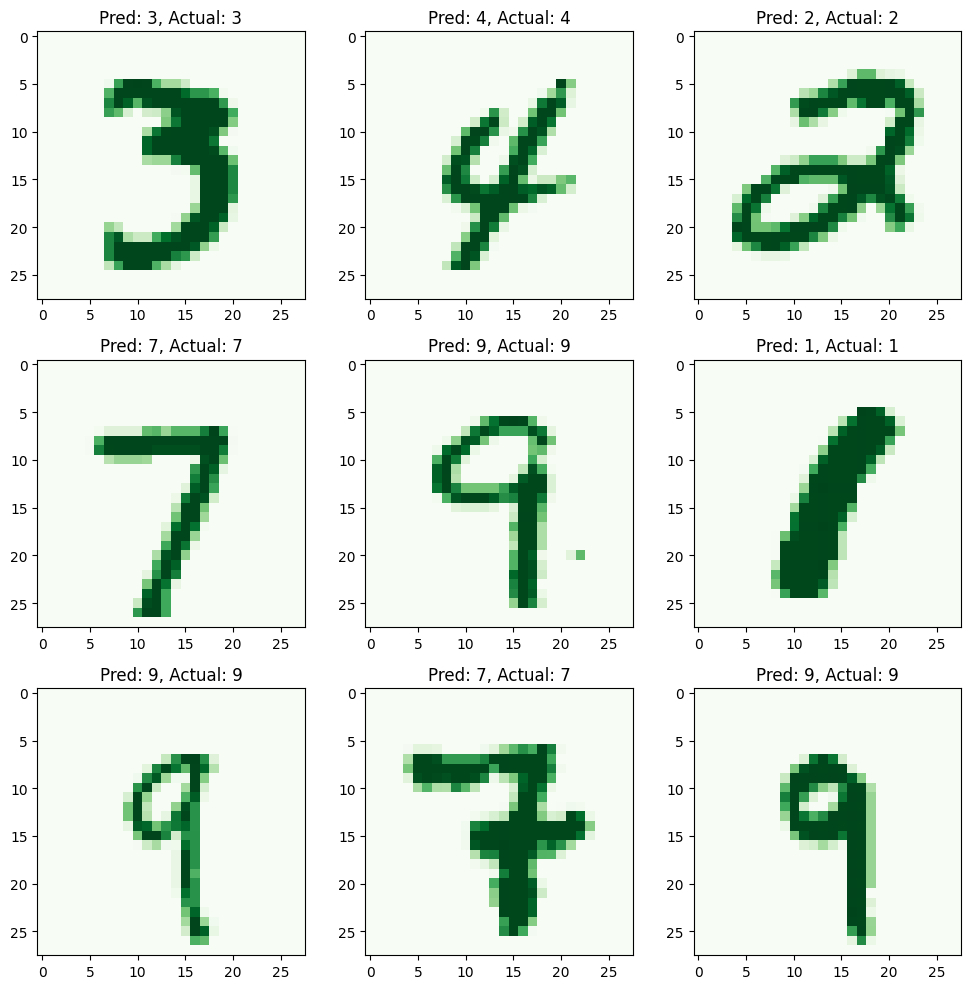

In [ ]:
num_images = 9
indices = np.random.choice(len(X_test), num_images, replace=False)
images = X_test[indices]

actual_labels = np.argmax(y_test[indices], axis=1)  # Get actual labels
predicted_labels = np.argmax(model_Cnn2.predict(images), axis=1)  # Predict labels


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='Greens')
    ax.set_title(f'Pred: {predicted_labels[i]}, Actual: {actual_labels[i]}', fontsize=12)


plt.tight_layout()
plt.show();


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Supervisor: Abdelrahman \space Eid $$